In [2]:
!pip install pycaret

     |████████████████████████████████| 288 kB 4.3 MB/s 
     |████████████████████████████████| 1.3 MB 38.4 MB/s 
     |████████████████████████████████| 167 kB 69.4 MB/s 
     |████████████████████████████████| 6.8 MB 17.7 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 15.5 MB 20.1 MB/s 
     |████████████████████████████████| 1.7 MB 43.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 53.6 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 2.0 MB 45.0 MB/s 
     |████████████████████████████████| 261 kB 40.0 MB/s 
     |████████████████████████████████| 3.1 MB 41.0 MB/s 
     |████████████████████████████████| 596 kB 39.0 MB/s 
     |████████████████████████████████| 10.1 MB 28.3 MB/s 
     |████████████████

In [3]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [4]:
from pycaret.regression import *

In [5]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [6]:
blender_specific = blend_models(estimator_list = compare_models(n_select = 5))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2956.8294,2.107284e+07,4590.5161,0.8741,0.4704,0.4036
1,3035.7241,2.966195e+07,5446.2790,0.8275,0.4553,0.3276
2,2823.9649,2.153712e+07,4640.8100,0.7273,0.5433,0.4647
3,3087.7054,2.157234e+07,4644.6035,0.8199,0.5167,0.4908
4,3194.0246,2.828224e+07,5318.1050,0.7897,0.5338,0.4210
5,3037.1988,2.138060e+07,4623.9159,0.8625,0.3964,0.3363
6,2703.0887,2.015416e+07,4489.3381,0.8629,0.4158,0.3718
7,2780.4780,2.249121e+07,4742.4899,0.8763,0.4236,0.3069
8,2558.1031,1.854476e+07,4306.3628,0.8802,0.4612,0.4084
9,2937.4374,2.665219e+07,5162.5760,0.8283,0.5090,0.3842


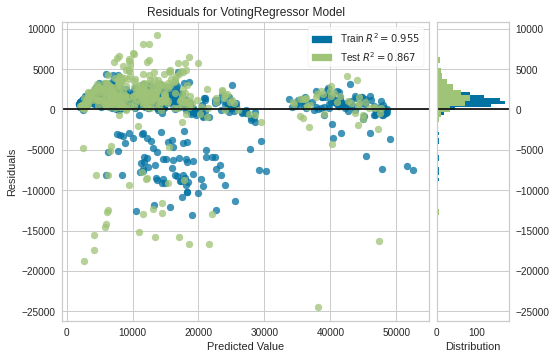

In [7]:
plot_model(blender_specific)

# Experiment 2

In [8]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [11]:
s2[0]

{'mae': <pycaret.containers.metrics.regression.MAEMetricContainer at 0x7f6a9a58ef90>,
 'mape': <pycaret.containers.metrics.regression.MAPEMetricContainer at 0x7f6a9f56d250>,
 'mse': <pycaret.containers.metrics.regression.MSEMetricContainer at 0x7f6a9a58ee90>,
 'r2': <pycaret.containers.metrics.regression.R2MetricContainer at 0x7f6a9a58ea50>,
 'rmse': <pycaret.containers.metrics.regression.RMSEMetricContainer at 0x7f6a9a58ed90>,
 'rmsle': <pycaret.containers.metrics.regression.RMSLEMetricContainer at 0x7f6a9f56d890>}

In [12]:
blender_specific = blend_models(estimator_list = compare_models(n_select = 5))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2840.9324,1.981268e+07,4451.1437,0.8817,0.3863,0.3075
1,3251.6613,3.154580e+07,5616.5650,0.8166,0.4311,0.3100
2,2991.7788,2.299922e+07,4795.7500,0.7088,0.5328,0.4012
3,2800.3681,1.852181e+07,4303.6972,0.8453,0.4316,0.3736
4,3160.1732,2.684215e+07,5180.9409,0.8004,0.4658,0.3107
5,3182.2308,2.387253e+07,4885.9526,0.8464,0.3924,0.2879
6,2727.9471,2.249684e+07,4743.0835,0.8469,0.3733,0.3057
7,3292.2493,2.858507e+07,5346.5007,0.8428,0.4590,0.2961
8,2874.1045,2.048262e+07,4525.7728,0.8677,0.3859,0.3179
9,3168.6690,2.773666e+07,5266.5609,0.8213,0.5208,0.3813


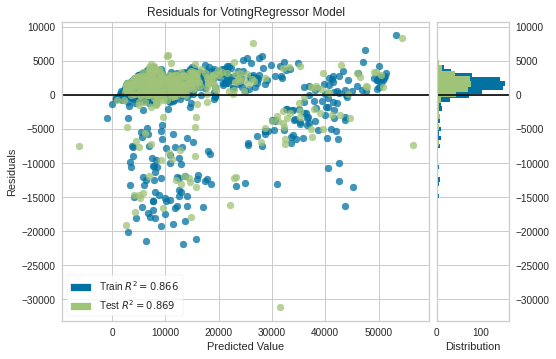

In [14]:
plot_model(blender_specific)

In [ ]:
save_model(lr, 'deployment_21112021')

Transformation Pipeline and Model Succesfully Saved


In [21]:
deployment_21112021 = load_model('deployment_21112021')

Transformation Pipeline and Model Successfully Loaded


In [22]:
deployment_21112021

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                                            normalize=False,
                                                            tol=0.001,
                                                            verbose=False)),
                                             ('lasso',
                                             